In [3]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [46]:
# data_100 = './test_data/20191120_Kinetics_CV_100rpm_C02.txt'
# data_400 = './test_data/20191120_Kinetics_CV_400rpm_C02.txt'
# data_900 = './test_data/20191120_Kinetics_CV_900rpm_C02.txt'
# data_1600 = './test_data/20191120_Kinetics_CV_1600rpm_C02.txt'
# data_2500 = './test_data/20191120_Kinetics_CV_2500rpm_C02.txt'

In [48]:
data_100 = './RDE_data/02262020_MnO2_RDE_50mVs_100rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_400 = './RDE_data/02262020_MnO2_RDE_50mVs_400rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_900 = './RDE_data/02262020_MnO2_RDE_50mVs_900rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_1600 = './RDE_data/02262020_MnO2_RDE_50mVs_1600rpm_ExtendedBounds_IncreasedFlow_C04.mpt'
data_2500 = './RDE_data/02262020_MnO2_RDE_50mVs_2500rpm_ExtendedBounds_IncreasedFlow_C04.mpt'

In [53]:
rpm100 = pd.read_csv(data_100,sep='\t',header=(52),usecols=range(12)) 
rpm400 = pd.read_csv(data_400,sep='\t',header=(52),usecols=range(12)) 
rpm900 = pd.read_csv(data_900,sep='\t',header=(52),usecols=range(12)) 
rpm1600 = pd.read_csv(data_1600,sep='\t',header=(52),usecols=range(12)) 
rpm2500 = pd.read_csv(data_2500,sep='\t',header=(52),usecols=range(12)) 

In [54]:
RPM = rpm100,rpm400,rpm900,rpm1600,rpm2500

In [56]:
rpm400

,mode,ox/red,error,control changes,counter inc.,time/s,control/V,Ewe/V,<I>/mA,cycle number,(Q-Qo)/C,P/W
0,2,1,0,0,0,0.000000,-0.996980,-0.997440,-0.264734,1.0,0.000000,0.000264
1,2,1,0,0,0,0.011000,-0.996430,-0.996845,-0.249511,1.0,-0.000003,0.000249
2,2,1,0,0,0,0.031000,-0.995430,-0.995866,-0.226134,1.0,-0.000008,0.000225
3,2,1,0,0,0,0.051000,-0.994429,-0.994879,-0.207541,1.0,-0.000012,0.000206
4,2,1,0,0,0,0.071000,-0.993429,-0.993882,-0.192264,1.0,-0.000016,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...
25565,2,1,0,1,0,511.881987,-1.003033,-1.003505,-0.049891,4.0,-0.019142,0.000050
25566,2,1,0,1,0,511.901987,-1.002033,-1.002477,-0.049846,4.0,-0.019143,0.000050
25567,2,1,0,1,0,511.921987,-1.001032,-1.001485,-0.049786,4.0,-0.019144,0.000050
25568,2,1,0,1,0,511.936987,-1.000282,-1.000743,-0.049698,4.0,-0.019145,0.000050


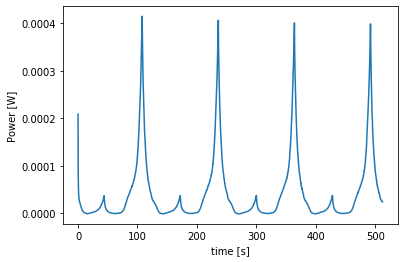

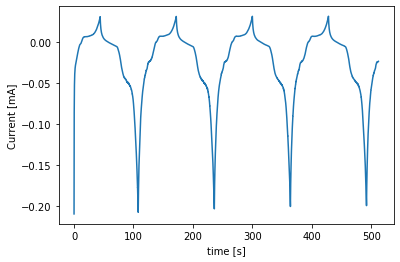

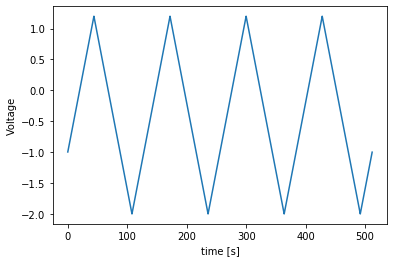

In [59]:
plt.plot(rpm100['time/s'],rpm100['P/W'])
plt.ylabel('Power [W]')
plt.xlabel('time [s]')
plt.show()

plt.plot(rpm100['time/s'],rpm100['<I>/mA'])
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

plt.plot(rpm100['time/s'],rpm100['Ewe/V'])
plt.ylabel('Voltage')
plt.xlabel('time [s]')
plt.show()

In [62]:
## This is from test data when current was not included and we had to calculate it!
# P_100 = np.array(rpm100['P/W'])
# Ewe_100 = np.array(rpm100['Ewe/V'])
# I_100 = P_100/Ewe_100*1000 
# cycles_100 = rpm100['cycle number']

# plt.plot(rpm100['time/s'],I_100)
# plt.ylabel('Current [mA]')
# plt.xlabel('time [s]')
# plt.show()

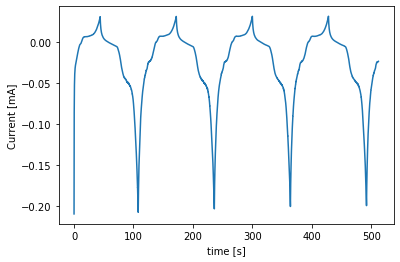

In [63]:
P_100 = np.array(rpm100['P/W'])
Ewe_100 = np.array(rpm100['Ewe/V'])
I_100 = np.array(rpm100['<I>/mA'])
cycles_100 = rpm100['cycle number']

plt.plot(rpm100['time/s'],I_100)
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

In [64]:
#Looking for equilibrium voltage
for l in range(len(I_100)):
    if abs(I_100[l]) < 1e-5:
        print(rpm100['time/s'][l],I_100[l],rpm100['Ewe/V'][l])

12.620199681186929 -2.334894430886187e-07 -0.3663626
56.70919856740511 -4.032693059880595e-06 0.56115276
56.729198566899875 -7.804455591219219e-06 0.56017268
138.04799651261422 8.465198302529448e-06 -0.49506518
185.0701953247335 5.667155438260436e-07 0.54313517
313.0509920916666 -1.357671192951197e-06 0.54415447
394.14959004294366 -1.7382997668945339e-06 -0.49003604
440.9715888601204 9.731894522345552e-06 0.54816216
440.9916888596127 6.215776803037551e-06 0.54725903


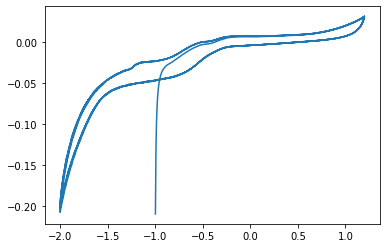

In [65]:
# m = 0
# Es = []
# Is = []
# while cycles_100[m] == 1:
#     Es.append(Ewe_100[m])
#     Is.append(I_100[m])
    
plt.plot(Ewe_100,I_100)

In [66]:
E_cycle1 = []
E_cycle2 = []
E_cycle3 = []
E_cycle4 = []

i_cycle1 = []
i_cycle2 = []
i_cycle3 = []
i_cycle4 = []

for m in range(len(cycles_100)):
    if cycles_100[m] == 1:
        E_cycle1.append(Ewe_100[m])
        i_cycle1.append(I_100[m])
    elif cycles_100[m] == 2:
        E_cycle2.append(Ewe_100[m])
        i_cycle2.append(I_100[m])
    elif cycles_100[m] == 3:
        E_cycle3.append(Ewe_100[m])
        i_cycle3.append(I_100[m])
    elif cycles_100[m] == 4:
        E_cycle4.append(Ewe_100[m])
        i_cycle4.append(I_100[m])

print(len(E_cycle1), len(E_cycle2), len(E_cycle3), len(E_cycle4))
print('cycles are different lengths- be aware when trying to compare')

6388 6391 6391 6392
cycles are different lengths- be aware when trying to compare


2193 6391


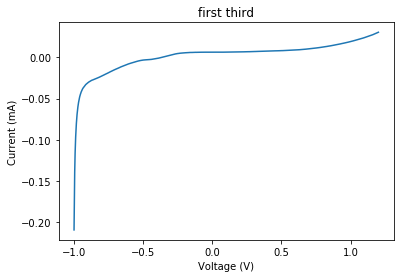

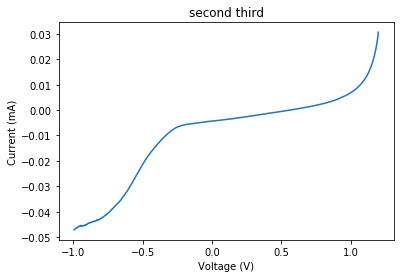

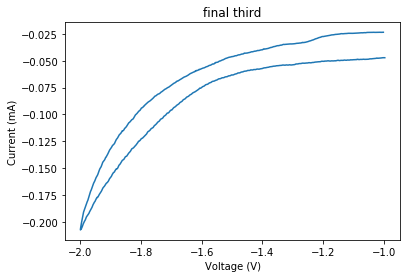

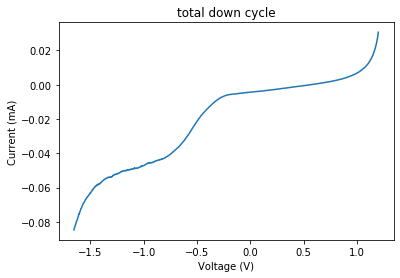

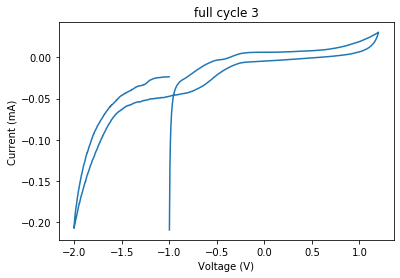

In [114]:
a = int(len(E_cycle3)/3)
a = int(a*1.03)
print(a, len(E_cycle3))
plt.plot(E_cycle1[0:a],i_cycle1[0:a])
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('first third')
plt.show()

plt.plot(E_cycle1[a:a*2],i_cycle1[a:a*2])
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('second third')
plt.show()

plt.plot(E_cycle1[a*2:],i_cycle1[a*2:])
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('final third')
plt.show()

plt.plot(E_cycle1[a:int(a*2.3)],i_cycle1[a:int(a*2.3)])
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('total down cycle')
plt.show()

plt.plot(E_cycle1,i_cycle1)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('full cycle 3')
plt.show()

In [11]:
plt.plot(E_cycle1[0:a],i_cycle1[0:a])
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.show()
def BV(E_cell, j0, aa, ac):
    F = 96485.33212 #C/mol
    R = 8.314 #J/mol-K
    T = 293 #K
    overpotential = E_cell - 1.1
    z = 2
    
    j = j0*(np.exp(aa*z*F*overpotential*(R*T)**(-1))-np.exp(ac*z*F*overpotential*(R*T)**(-1)))
    
    return j

### Testing with 1 cycle:

In [12]:
# curve_fit(objective_function, E_cycle1[0:a],i_cycle1[0:a])[0]
a = int(len(E_cycle1)/2)
ans = curve_fit(BV, np.array(E_cycle1[0:a]),i_cycle1[0:a])
j0_fit, aa_fit, ac_fit = ans[0]
print('j0,aa,ac:', j0_fit, aa_fit, ac_fit)
pcov = ans[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans[0]*100 )
print('pretty small! this does not mean they are good estimates though')

j0,aa,ac: 0.6984020846041802 0.06535228115004106 0.36501861371928523
errors: [0.00586936 0.00034955 0.01025805]
errors r this % of values: [0.84039804 0.53486944 2.81028169]
pretty small! this does not mean they are good estimates though


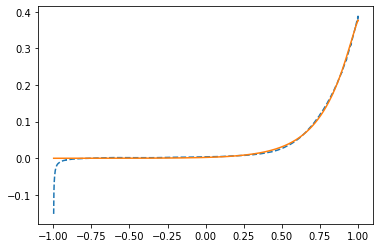

In [13]:
j_fits = BV(np.array(E_cycle1[0:a]),j0_fit, aa_fit, ac_fit)
plt.plot(E_cycle1[0:a],i_cycle1[0:a], '--')
plt.plot(E_cycle1[0:a],j_fits)


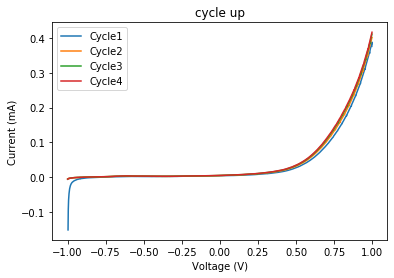

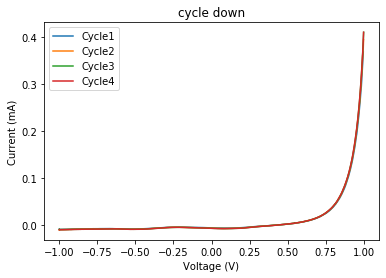

In [14]:
a = int(len(E_cycle1)/2)
b = int(len(E_cycle2)/2)
c = int(len(E_cycle3)/2)
d = int(len(E_cycle4)/2)

plt.plot(E_cycle1[0:a],i_cycle1[0:a],label = 'Cycle1')
plt.plot(E_cycle2[0:b],i_cycle2[0:b],label = 'Cycle2')
plt.plot(E_cycle3[0:c],i_cycle3[0:c],label = 'Cycle3')
plt.plot(E_cycle4[0:d],i_cycle4[0:d],label = 'Cycle4')
plt.title('cycle up')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.legend()
plt.show()

plt.plot(E_cycle1[a:],i_cycle1[a:],label = 'Cycle1')
plt.plot(E_cycle2[b:],i_cycle2[b:],label = 'Cycle2')
plt.plot(E_cycle3[c:],i_cycle3[c:],label = 'Cycle3')
plt.plot(E_cycle4[d:],i_cycle4[d:],label = 'Cycle4')
plt.title('cycle down')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.legend()
plt.show()


In [15]:
j0s = []
aas = []
acs = []

ans_up = curve_fit(BV, np.array(E_cycle1[0:a]),i_cycle1[0:a])
ans_down = curve_fit(BV, np.array(E_cycle1[a:]),i_cycle1[a:])

j0_fit_up, aa_fit_up, ac_fit_up = ans_up[0]
print('UP: j0,aa,ac:', j0_fit_up, aa_fit_up, ac_fit_up)
pcov = ans_up[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans_up[0]*100 )
print('')

j0s.append(j0_fit_up)
aas.append(aa_fit_up)
acs.append(ac_fit_up)

j0_fit_down, aa_fit_down, ac_fit_down = ans_down[0]
print('DOWN: j0,aa,ac:', j0_fit_down, aa_fit_down, ac_fit_down)
pcov2 = ans_down[1]
perr2 = np.sqrt(np.diag(pcov2))
print('errors:',perr2)
print('errors r this % of values:',perr2/ans_down[0]*100 )

UP: j0,aa,ac: 0.6984020846041802 0.06535228115004106 0.36501861371928523
errors: [0.00586936 0.00034955 0.01025805]
errors r this % of values: [0.84039804 0.53486944 2.81028169]

DOWN: j0,aa,ac: 1.119410784859951 0.1472909871246844 257.9540604125512
errors: [inf inf inf]
errors r this % of values: [inf inf inf]


C:\Users\MaryLou\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [16]:
ans_up = curve_fit(BV, np.array(E_cycle2[0:b]),i_cycle2[0:b])
ans_down = curve_fit(BV, np.array(E_cycle2[b:]),i_cycle2[b:])

j0_fit_up, aa_fit_up, ac_fit_up = ans_up[0]
print('UP: j0,aa,ac:', j0_fit_up, aa_fit_up, ac_fit_up)
pcov = ans_up[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans_up[0]*100 )
print('')

j0s.append(j0_fit_up)
aas.append(aa_fit_up)
acs.append(ac_fit_up)

j0_fit_down, aa_fit_down, ac_fit_down = ans_down[0]
print('DOWN: j0,aa,ac:', j0_fit_down, aa_fit_down, ac_fit_down)
pcov2 = ans_down[1]
perr2 = np.sqrt(np.diag(pcov2))
print('errors:',perr2)
print('errors r this % of values:',perr2/ans_down[0]*100 )

UP: j0,aa,ac: 0.7127588310239279 0.06258918315744932 0.34896900119878377
errors: [0.00241114 0.00013557 0.00380841]
errors r this % of values: [0.33828246 0.21660146 1.09133246]

DOWN: j0,aa,ac: 1.1921914833840281 0.14955406290416606 116.5814530217532
errors: [inf inf inf]
errors r this % of values: [inf inf inf]


In [17]:
ans_up = curve_fit(BV, np.array(E_cycle3[0:c]),i_cycle3[0:c])
ans_down = curve_fit(BV, np.array(E_cycle3[c:]),i_cycle3[c:])

j0_fit_up, aa_fit_up, ac_fit_up = ans_up[0]
print('UP: j0,aa,ac:', j0_fit_up, aa_fit_up, ac_fit_up)
pcov = ans_up[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans_up[0]*100 )
print('')

j0s.append(j0_fit_up)
aas.append(aa_fit_up)
acs.append(ac_fit_up)

j0_fit_down, aa_fit_down, ac_fit_down = ans_down[0]
print('DOWN: j0,aa,ac:', j0_fit_down, aa_fit_down, ac_fit_down)
pcov2 = ans_down[1]
perr2 = np.sqrt(np.diag(pcov2))
print('errors:',perr2)
print('errors r this % of values:',perr2/ans_down[0]*100 )

C:\Users\MaryLou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  


UP: j0,aa,ac: 0.7356959942030771 0.06207330927141335 0.32734228226595424
errors: [0.00274808 0.00014523 0.00345089]
errors r this % of values: [0.37353467 0.23397034 1.05421591]

DOWN: j0,aa,ac: 1.2460455932845593 0.1515682751999209 115.0372045957835
errors: [inf inf inf]
errors r this % of values: [inf inf inf]


In [18]:
ans_up = curve_fit(BV, np.array(E_cycle4[0:d]),i_cycle4[0:d])
ans_down = curve_fit(BV, np.array(E_cycle4[d:]),i_cycle4[d:])

j0_fit_up, aa_fit_up, ac_fit_up = ans_up[0]
print('UP: j0,aa,ac:', j0_fit_up, aa_fit_up, ac_fit_up)
pcov = ans_up[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans_up[0]*100 )
print('')

j0s.append(j0_fit_up)
aas.append(aa_fit_up)
acs.append(ac_fit_up)

j0_fit_down, aa_fit_down, ac_fit_down = ans_down[0]
print('DOWN: j0,aa,ac:', j0_fit_down, aa_fit_down, ac_fit_down)
pcov2 = ans_down[1]
perr2 = np.sqrt(np.diag(pcov2))
print('errors:',perr2)
print('errors r this % of values:',perr2/ans_down[0]*100 )

UP: j0,aa,ac: 0.7424016195274946 0.06161643722626101 0.32596896840055534
errors: [0.00289069 0.00015094 0.0035561 ]
errors r this % of values: [0.3893702  0.24496552 1.09093141]

DOWN: j0,aa,ac: 1.2466608628556233 0.1511128461184393 147.4240335298961
errors: [inf inf inf]
errors r this % of values: [inf inf inf]


C:\Users\MaryLou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


In [19]:
print(j0s)
np.average(np.array(j0s)), np.std(np.array(j0s)), np.std(np.array(j0s))/np.average(np.array(j0s)) 

[0.6984020846041802, 0.7127588310239279, 0.7356959942030771, 0.7424016195274946]


(0.72231463233967, 0.017647033586351654, 0.02443122816049101)

In [20]:
print(aas)
np.average(np.array(aas)), np.std(np.array(aas)),np.std(np.array(aas))/np.average(np.array(aas)) 

[0.06535228115004106, 0.06258918315744932, 0.06207330927141335, 0.06161643722626101]


(0.06290780270129119, 0.001452669729732964, 0.023092043710869394)

In [21]:
print(acs)
np.average(np.array(acs)), np.std(np.array(acs)),np.std(np.array(acs))/np.average(np.array(acs)) 

[0.36501861371928523, 0.34896900119878377, 0.32734228226595424, 0.32596896840055534]


(0.34182471639614465, 0.01620295745545043, 0.04740136297421113)

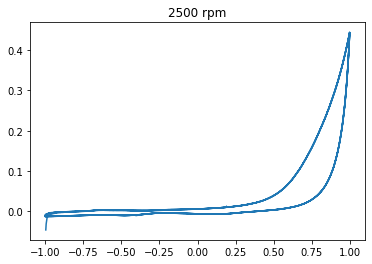

Text(0.5, 1.0, '100 rpm')

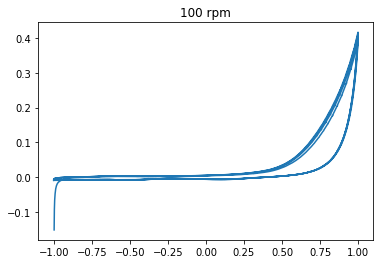

In [22]:
P_2500 = np.array(rpm2500['P/W'])
Ewe_2500 = np.array(rpm2500['Ewe/V'])
I_2500 = P_2500/Ewe_2500*1000 
cycles_2500 = rpm2500['cycle number']

plt.plot(Ewe_2500,I_2500)
plt.title('2500 rpm')
plt.show()
plt.plot(Ewe_100,I_100)
plt.title('100 rpm')

In [23]:
def find_params(n):
    RPM = rpm100,rpm400,rpm900,rpm1600,rpm2500
#     if rpm==100: n=0
#     elif rpm==400: n=1
#     elif rpm==900: n=2
#     elif rpm==1600: n=3
#     elif rpm==2500: n=4
    data = RPM[n]
    
    Ps = np.array(data['P/W'])
    Es = np.array(data['Ewe/V'])
    Is = Ps/Es*1000 
    cycle_nums = data['cycle number']
    
    E_cycle1 = []
    E_cycle2 = []
    E_cycle3 = []
    E_cycle4 = []

    i_cycle1 = []
    i_cycle2 = []
    i_cycle3 = []
    i_cycle4 = []

    for m in range(len(cycle_nums)):
        if cycle_nums[m] == 1:
            E_cycle1.append(Es[m])
            i_cycle1.append(Is[m])
        elif cycle_nums[m] == 2:
            E_cycle2.append(Es[m])
            i_cycle2.append(Is[m])
        elif cycle_nums[m] == 3:
            E_cycle3.append(Es[m])
            i_cycle3.append(Is[m])
        elif cycle_nums[m] == 4:
            E_cycle4.append(Es[m])
            i_cycle4.append(Is[m])
            
    E_sorted = E_cycle1, E_cycle2, E_cycle3, E_cycle4
    i_sorted = i_cycle1, i_cycle2, i_cycle3, i_cycle4
            
    a = int(len(E_cycle1)/2)
    b = int(len(E_cycle2)/2)
    c = int(len(E_cycle3)/2)
    d = int(len(E_cycle4)/2)
    halfways = a,b,c,d
    
    j0s = []
    aas = []
    acs = []
    
    for cycle in range(4):
        halfway = halfways[cycle]
        E = E_sorted[cycle]
        i = i_sorted[cycle]
        
        ans = curve_fit(BV, np.array(E[0:halfway]),i[0:halfway]) #first half of cycle

        j0_fit, aa_fit, ac_fit = ans[0]
        print('Cycle {}:\nj0: {:.2f} aa: {:.2f} ac: {:.2f}'.format(cycle+1,j0_fit, aa_fit, ac_fit))
        pcov = ans[1]
        perr = np.sqrt(np.diag(pcov))
        print('errors:',perr)
        print('errors are this fraction of values:',perr/ans[0])
        print('')

        j0s.append(j0_fit)
        aas.append(aa_fit)
        acs.append(ac_fit)
        plt.plot()
        
    avg_params = np.average(np.array(j0s)), np.average(np.array(aas)), np.average(np.array(acs))
    print(avg_params)
    solution_object = avg_params
    print('print average values and errors here')
    return solution_object

# one_hundo = find_params(100)
# twentyfive_hundo = find_params(2500)
# one_hundo,twentyfive_hundo

Cycle 1:
j0: 0.70 aa: 0.07 ac: 0.37
errors: [0.00586936 0.00034955 0.01025805]
errors are this fraction of values: [0.00840398 0.00534869 0.02810282]

Cycle 2:
j0: 0.71 aa: 0.06 ac: 0.35
errors: [0.00241114 0.00013557 0.00380841]
errors are this fraction of values: [0.00338282 0.00216601 0.01091332]

Cycle 3:
j0: 0.74 aa: 0.06 ac: 0.33
errors: [0.00274808 0.00014523 0.00345089]
errors are this fraction of values: [0.00373535 0.0023397  0.01054216]

Cycle 4:
j0: 0.74 aa: 0.06 ac: 0.33
errors: [0.00289069 0.00015094 0.0035561 ]
errors are this fraction of values: [0.0038937  0.00244966 0.01090931]

(0.72231463233967, 0.06290780270129119, 0.34182471639614465)
print average values and errors here


C:\Users\MaryLou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  
C:\Users\MaryLou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


Cycle 1:
j0: 0.77 aa: 0.06 ac: 0.31
errors: [0.00321934 0.00016085 0.00332755]
errors are this fraction of values: [0.00420054 0.00262108 0.01059845]

Cycle 2:
j0: 0.78 aa: 0.06 ac: 0.30
errors: [0.00324383 0.00015719 0.00303647]
errors are this fraction of values: [0.00417786 0.00255345 0.00999149]

Cycle 3:
j0: 0.78 aa: 0.06 ac: 0.31
errors: [0.00326052 0.00015846 0.00320374]
errors are this fraction of values: [0.00419235 0.00258513 0.01039606]

Cycle 4:
j0: 0.78 aa: 0.06 ac: 0.31
errors: [0.00334226 0.00016115 0.00319347]
errors are this fraction of values: [0.00428107 0.00263317 0.01044762]

(0.7753199800393462, 0.06135596122297407, 0.3079265439643205)
print average values and errors here
Cycle 1:
j0: 0.79 aa: 0.06 ac: 0.31
errors: [0.00352712 0.00016991 0.00333012]
errors are this fraction of values: [0.0044923  0.00279008 0.01085567]

Cycle 2:
j0: 0.78 aa: 0.06 ac: 0.29
errors: [0.00340005 0.00016227 0.00283082]
errors are this fraction of values: [0.00437541 0.00262704 0.009647

[(0.72231463233967, 0.06290780270129119, 0.34182471639614465),
 (0.7753199800393462, 0.06135596122297407, 0.3079265439643205),
 (0.7857103760939479, 0.06139352471453875, 0.30119897946379015),
 (0.8101286298902258, 0.061427826642497796, 0.29493722678441897),
 (0.8196450965427178, 0.061374891237299, 0.2916071448135108)]

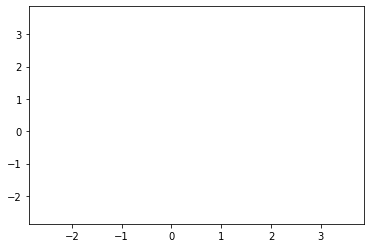

In [24]:
params = []
for n in range(len(RPM)):
    param = find_params(n)
    params.append(param)

params

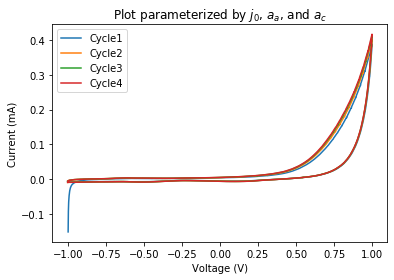

In [33]:
plt.plot(E_cycle1,i_cycle1,label = 'Cycle1')
plt.plot(E_cycle2,i_cycle2,label = 'Cycle2')
plt.plot(E_cycle3,i_cycle3,label = 'Cycle3')
plt.plot(E_cycle4,i_cycle4,label = 'Cycle4')
plt.title('Plot parameterized by $j_0$, $a_a$, and $a_c$')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.legend()
plt.savefig('V_I_graph.png', dpi=1000, format = 'png',transparent=True)
plt.show()